In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Требуется исследовать, зависит ли факт провала клиента в просрочку от набора признаков. Постройте дерево решений и сделайте вывод о взаимосвязях. Факт провала в просрочку (таргет-величина) представлена колонкой flag_coll (1 - провалился в просрочку, 0 - не провалился в просрочку)
**Описание признаков:**

- amt_credit - Размер выданного кредита
- bki - Размер внешнего долга по Бюро Кредитный Историй
- age - возраст клиента (полных лет)
- is_educ - флаг, показывающий, есть ли у клиента высшее образование
- cl_segm - клиентский сегмент (качество клиента, от 1 до 4)
- credit_type - кредитный продукт
    - CC - Credit Card (Кредитная карта)
    - POS - потребительский кредит
- fssp - размер долга, переданный в Федеральную Службу Судебных Приставов
- cnt_closed_contract - кол-во уже закрытых клиентом контрактов в нашем банке
- is_cellphone - флаг, показывающий, есть ли у клиента подтвержденный номер мобильного телефона

In [2]:
bancs = pd.read_csv('Датасет банки.csv', sep = ';')


In [3]:
bancs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_client            9568 non-null   int64  
 1   flag_coll            9406 non-null   float64
 2   amt_credit           9361 non-null   float64
 3   bki                  9361 non-null   float64
 4   age                  9361 non-null   float64
 5   is_educ              9361 non-null   float64
 6   cl_segm              9361 non-null   float64
 7   credit_type          9361 non-null   object 
 8   fssp                 9361 non-null   float64
 9   cnt_closed_contract  9361 non-null   float64
 10  is_cellphone         9361 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 822.4+ KB


In [4]:
train_bancs = bancs.dropna()

In [5]:
train_bancs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9361 entries, 0 to 9360
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_client            9361 non-null   int64  
 1   flag_coll            9361 non-null   float64
 2   amt_credit           9361 non-null   float64
 3   bki                  9361 non-null   float64
 4   age                  9361 non-null   float64
 5   is_educ              9361 non-null   float64
 6   cl_segm              9361 non-null   float64
 7   credit_type          9361 non-null   object 
 8   fssp                 9361 non-null   float64
 9   cnt_closed_contract  9361 non-null   float64
 10  is_cellphone         9361 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 877.6+ KB


In [6]:
train_bancs['flag_coll'].unique()

array([ 1.,  0., -1.])

В значениях таргет-величины есть странные значения -1. Тогда как должны быть только 0 и 1. Оставим только их.

In [7]:
train_bancs = train_bancs.loc[train_bancs['flag_coll'] != -1]

<AxesSubplot:xlabel='is_educ', ylabel='count'>

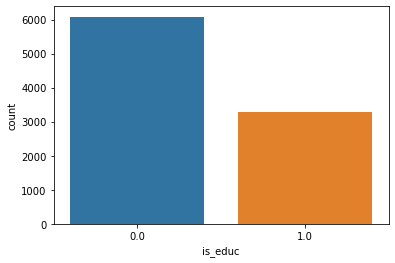

In [8]:
sns.countplot(x='is_educ', data=train_bancs)


<AxesSubplot:xlabel='cl_segm', ylabel='count'>

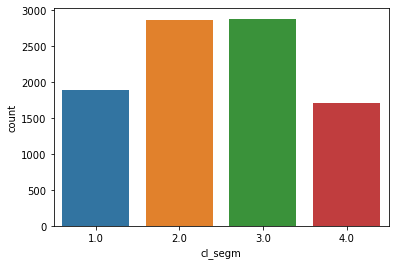

In [9]:
sns.countplot(x='cl_segm', data=train_bancs)


<AxesSubplot:xlabel='credit_type', ylabel='count'>

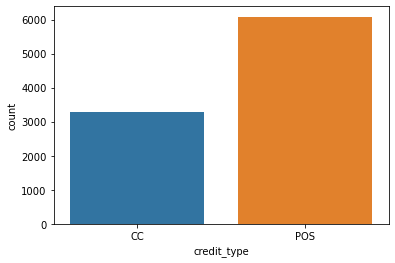

In [10]:
sns.countplot(x='credit_type', data=train_bancs)


<AxesSubplot:xlabel='is_cellphone', ylabel='count'>

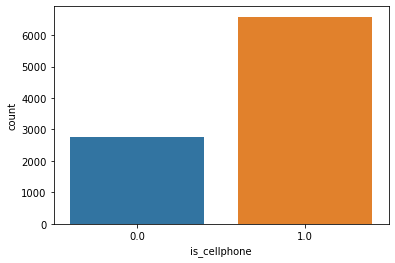

In [11]:
sns.countplot(x='is_cellphone', data=train_bancs)


In [12]:
train_bancs.rename(columns = {'flag_coll':'delay'}, inplace = True)

In [13]:
# new feature
train_bancs['no_delay'] = 1 - train_bancs['delay']

<AxesSubplot:xlabel='is_educ'>

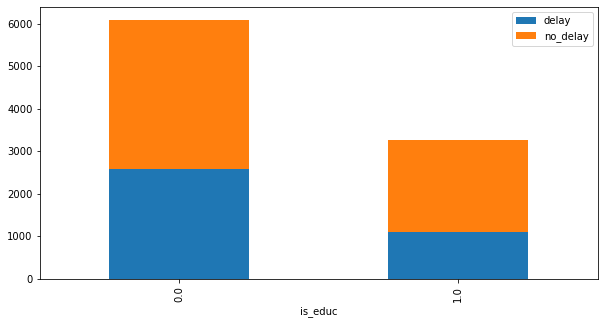

In [14]:
train_bancs.groupby('is_educ').agg('sum')[['delay', 'no_delay']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:xlabel='is_educ'>

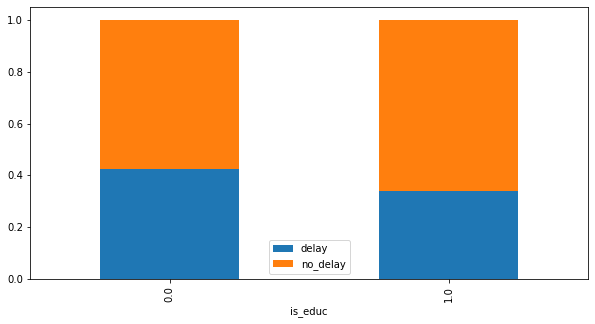

In [15]:
train_bancs.groupby('is_educ').agg('mean')[['delay', 'no_delay']].plot(kind='bar',
                                                            figsize=(10, 5),
                                                            stacked=True)

<AxesSubplot:xlabel='cl_segm'>

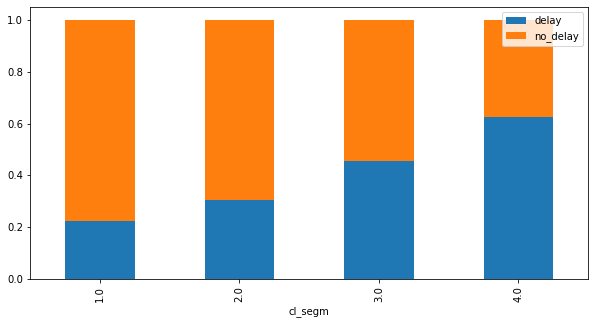

In [18]:
train_bancs.groupby('cl_segm').agg('mean')[['delay', 'no_delay']].plot(kind='bar',
                                                            figsize=(10, 5),
                                                            stacked=True)

<AxesSubplot:xlabel='credit_type'>

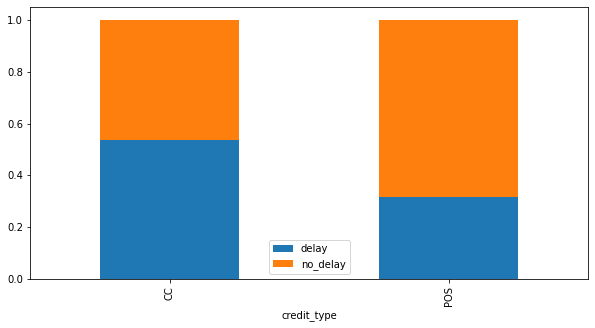

In [19]:
train_bancs.groupby('credit_type').agg('mean')[['delay', 'no_delay']].plot(kind='bar',
                                                            figsize=(10, 5),
                                                            stacked=True)

<AxesSubplot:xlabel='is_cellphone'>

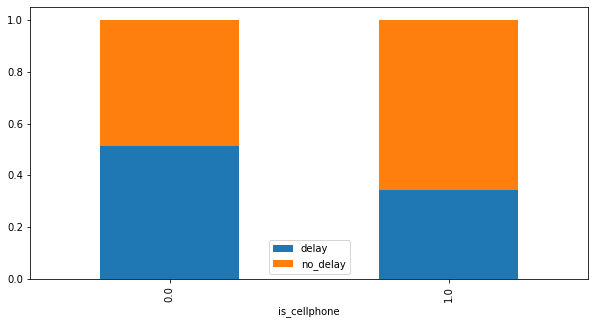

In [20]:
train_bancs.groupby('is_cellphone').agg('mean')[['delay', 'no_delay']].plot(kind='bar',
                                                            figsize=(10, 5),
                                                            stacked=True)

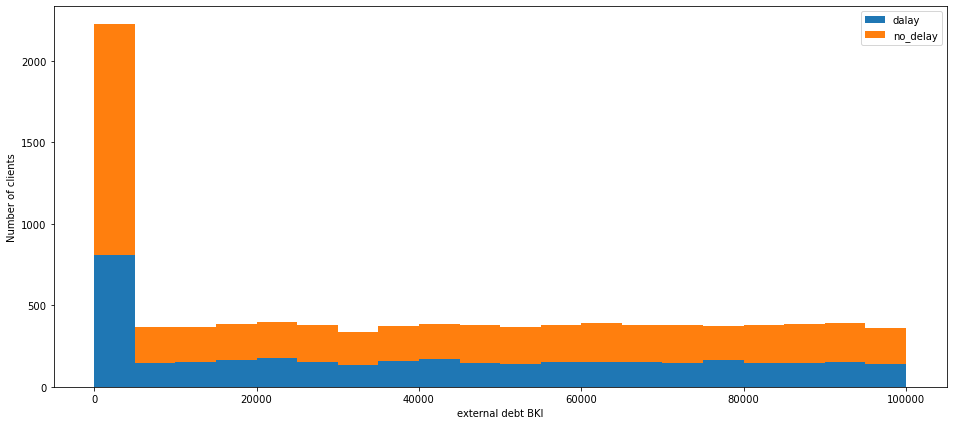

In [25]:
figure = plt.figure(figsize=(16, 7))
plt.hist([train_bancs[train_bancs['delay'] == 1]['bki'], train_bancs[train_bancs['delay'] == 0]['bki']], 
         stacked=True, bins = 20, label = ['dalay','no_delay'])
plt.xlabel('external debt BKI')
plt.ylabel('Number of clients')
plt.legend()

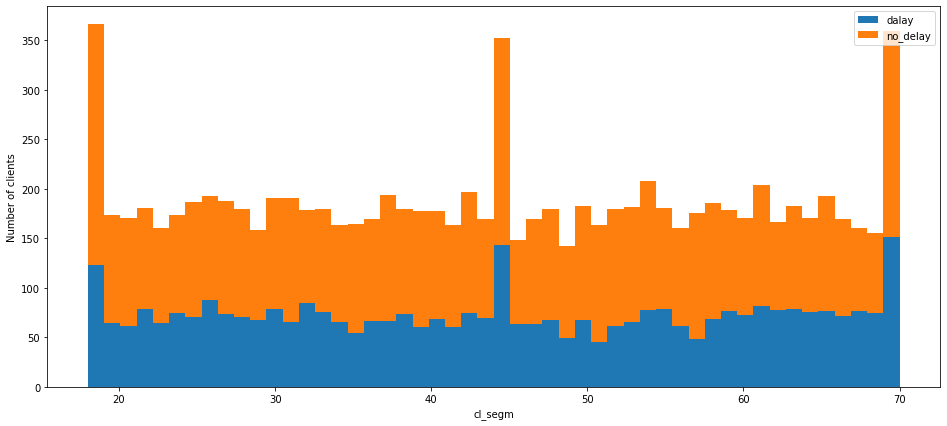

In [24]:
figure = plt.figure(figsize=(16, 7))
plt.hist([train_bancs[train_bancs['delay'] == 1]['age'], train_bancs[train_bancs['delay'] == 0]['age']], 
         stacked=True, bins = 50, label = ['dalay','no_delay'])
plt.xlabel('Age')
plt.ylabel('Number of clients')
plt.legend()

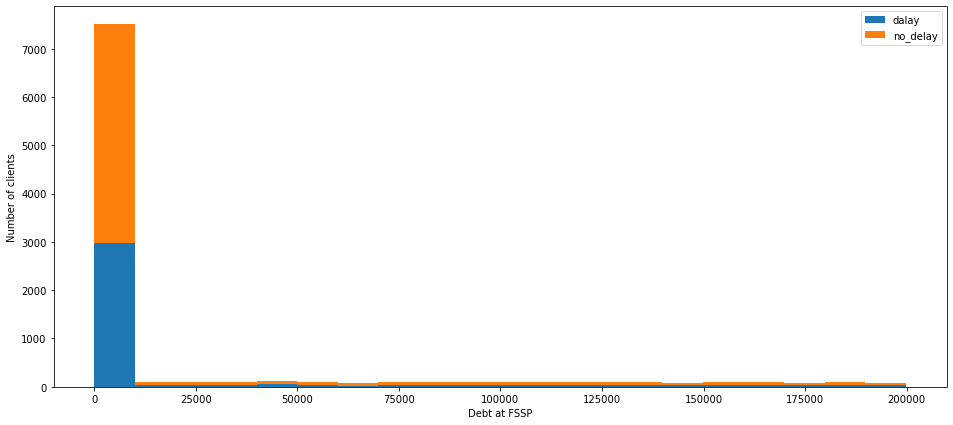

In [27]:
figure = plt.figure(figsize=(16, 7))
plt.hist([train_bancs[train_bancs['delay'] == 1]['fssp'], train_bancs[train_bancs['delay'] == 0]['fssp']], 
         stacked=True, bins = 20, label = ['dalay','no_delay'])
plt.xlabel('Debt at FSSP')
plt.ylabel('Number of clients')
plt.legend()

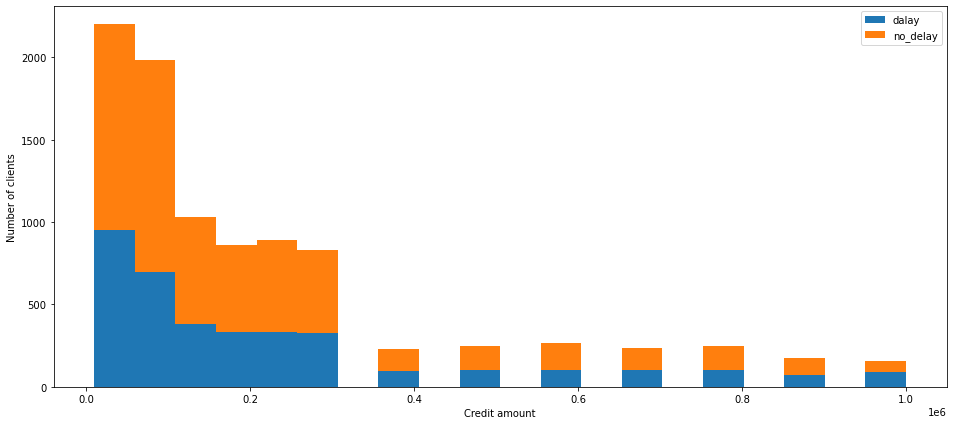

In [32]:
figure = plt.figure(figsize=(16, 7))
plt.hist([train_bancs[train_bancs['delay'] == 1]['amt_credit'], train_bancs[train_bancs['delay'] == 0]['amt_credit']], 
         stacked=True, bins = 20, label = ['dalay','no_delay'])
plt.xlabel('Credit amount')
plt.ylabel('Number of clients')
plt.legend()

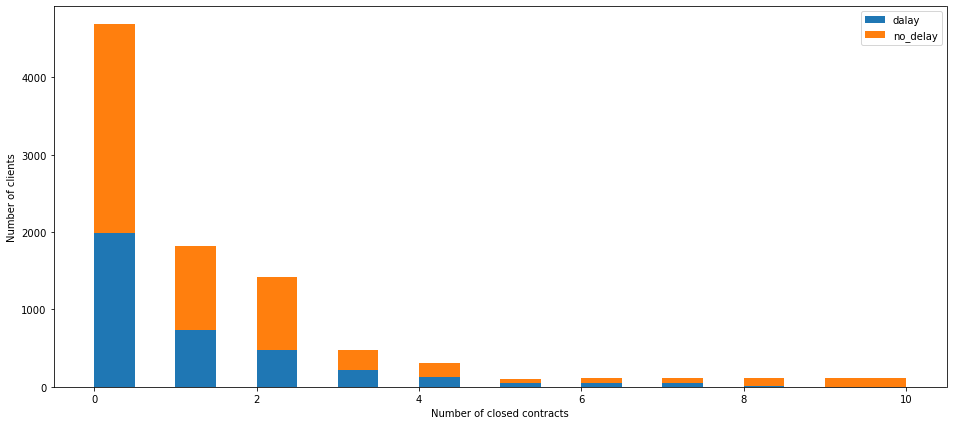

In [28]:
figure = plt.figure(figsize=(16, 7))
plt.hist([train_bancs[train_bancs['delay'] == 1]['cnt_closed_contract'], train_bancs[train_bancs['delay'] == 0]['cnt_closed_contract']], 
         stacked=True, bins = 20, label = ['dalay','no_delay'])
plt.xlabel('Number of closed contracts')
plt.ylabel('Number of clients')
plt.legend()

In [29]:
train_bancs

,id_client,delay,amt_credit,bki,age,is_educ,cl_segm,credit_type,fssp,cnt_closed_contract,is_cellphone,no_delay
0,1000001,1.0,225000.0,26395.0,68.0,0.0,2.0,CC,0.0,0.0,0.0,0.0
1,1000002,0.0,75000.0,89146.0,69.0,1.0,2.0,POS,0.0,1.0,1.0,1.0
2,1000003,0.0,10000.0,35635.0,56.0,1.0,3.0,CC,0.0,0.0,1.0,1.0
3,1000004,0.0,400000.0,60715.0,36.0,1.0,2.0,POS,0.0,0.0,0.0,1.0
4,1000005,1.0,175000.0,38110.0,48.0,0.0,2.0,POS,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9356,1009357,0.0,125000.0,0.0,53.0,1.0,2.0,CC,0.0,1.0,1.0,1.0
9357,1009358,0.0,200000.0,0.0,63.0,1.0,3.0,CC,0.0,0.0,1.0,1.0
9358,1009359,0.0,700000.0,43638.0,51.0,0.0,1.0,POS,0.0,0.0,1.0,1.0
9359,1009360,0.0,100000.0,0.0,26.0,1.0,2.0,POS,0.0,0.0,1.0,1.0


In [30]:
train_bancs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9356 entries, 0 to 9360
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_client            9356 non-null   int64  
 1   delay                9356 non-null   float64
 2   amt_credit           9356 non-null   float64
 3   bki                  9356 non-null   float64
 4   age                  9356 non-null   float64
 5   is_educ              9356 non-null   float64
 6   cl_segm              9356 non-null   float64
 7   credit_type          9356 non-null   object 
 8   fssp                 9356 non-null   float64
 9   cnt_closed_contract  9356 non-null   float64
 10  is_cellphone         9356 non-null   float64
 11  no_delay             9356 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 950.2+ KB


In [121]:
df1=train_bancs.drop(['no_delay','id_client'], axis=1)
df1.head()

,delay,amt_credit,bki,age,is_educ,cl_segm,credit_type,fssp,cnt_closed_contract,is_cellphone
0,1.0,225000.0,26395.0,68.0,0.0,2.0,CC,0.0,0.0,0.0
1,0.0,75000.0,89146.0,69.0,1.0,2.0,POS,0.0,1.0,1.0
2,0.0,10000.0,35635.0,56.0,1.0,3.0,CC,0.0,0.0,1.0
3,0.0,400000.0,60715.0,36.0,1.0,2.0,POS,0.0,0.0,0.0
4,1.0,175000.0,38110.0,48.0,0.0,2.0,POS,0.0,1.0,1.0


In [122]:
# Converting categorical feature to numeric
df1.credit_type=df1.credit_type.map({'CC':0, 'POS':1})
df1.head()

,delay,amt_credit,bki,age,is_educ,cl_segm,credit_type,fssp,cnt_closed_contract,is_cellphone
0,1.0,225000.0,26395.0,68.0,0.0,2.0,0,0.0,0.0,0.0
1,0.0,75000.0,89146.0,69.0,1.0,2.0,1,0.0,1.0,1.0
2,0.0,10000.0,35635.0,56.0,1.0,3.0,0,0.0,0.0,1.0
3,0.0,400000.0,60715.0,36.0,1.0,2.0,1,0.0,0.0,0.0
4,1.0,175000.0,38110.0,48.0,0.0,2.0,1,0.0,1.0,1.0


## Feature Scaling

In [123]:
df1.age = (df1.age-min(df1.age))/(max(df1.age)-min(df1.age))
df1.bki = (df1.bki-min(df1.bki))/(max(df1.bki)-min(df1.bki))
df1.fssp = (df1.fssp-min(df1.fssp))/(max(df1.fssp)-min(df1.fssp))
df1.amt_credit = (df1.amt_credit-min(df1.amt_credit))/(max(df1.amt_credit)-min(df1.amt_credit))


In [124]:
df1.describe()

,delay,amt_credit,bki,age,is_educ,cl_segm,credit_type,fssp,cnt_closed_contract,is_cellphone
count,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000
mean,0.394292,0.210825,0.402593,0.498302,0.349936,2.472531,0.650064,0.102779,1.312206,0.703399
std,0.488724,0.234346,0.326630,0.294531,0.476975,1.010471,0.476975,0.239433,2.068394,0.456784
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.065657,0.065571,0.250000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.116162,0.380788,0.500000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.267677,0.689819,0.750000,1.000000,3.000000,1.000000,0.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,10.000000,1.000000


## Decision Tree

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(['delay'], axis=1),
    df1.delay,
    test_size= 0.3,
    random_state=0,
    stratify=df1.delay
)

In [157]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [158]:
y_pred = tree.predict(X_test)

In [159]:
acc = accuracy_score(y_test,y_pred)

In [160]:
acc

0.6565728535803349

### Для размера тестовой выборки 10% acc=0,626, для 20%, acc=0,659, для 30% acc=0,668, для 40% acc=0,653, для 40% acc=0,648

In [161]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[1210,  490],
       [ 474,  633]], dtype=int64)

<AxesSubplot:>

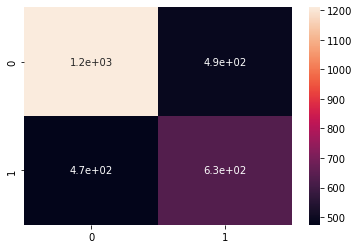

In [162]:
sns.heatmap(cm,annot=True)